In [84]:
#**********************************************COVID19*****************************************************************************************************************************************************************
#**********************************************MADRID**********************************************************************************
#*******************************************************************************************************************************
#ANALISIS DEL FICHEROS
#https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv
#Cargamos el fichero de doctores la ruta de kaggle:
#https://www.kaggle.com/antgoldbloom/doctors-and-nurses-per-1000-people-by-country
#Cargamos el fichero de contagios a nivel mundial. 
#https://www.kaggle.com/dylansp/covid19-country-level-data-for-epidemic-model#Country_Level_Info.csv
#La ruta del fichero de covid19 es: 

#import libraries
import numpy as np
import pandas as pd
#Importo las librerias para la representacion grafica. 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

#Importamos las librerias para los arboles de decision
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
#Importamos las librerias para realizar RandomForest. 
from sklearn.ensemble import RandomForestRegressor

#Importamos las librerias para Clustering
# K-Means clustering algorithm
from sklearn.cluster import KMeans

#Librerias para PCA(Analisis de Componentes Principales)
# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Para plotear bonitas figuras en jupyter. 
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = True

#Si queremos representar 3d
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D



In [85]:

#Abrimos los datos del fichero de entrenamiento.
#En este caso tenemos el fichero dividido por ';' por lo que le ponemos el";" para marcar el ;"
df = pd.read_csv('AlmacenDatos/Covid19_Spain.csv',sep=';', encoding = 'unicode_escape')
#Mostramos la cabecera de los casos de contagiados y muertos desde el inicio de la epidemia. 


In [86]:
df.head(10)

#df.describe()

,Fecha,CCAA,Region Desc,CASOS,Fallecidos,Hospitalizados,Recuperados,UCI,NUTS2,Densidad,...,Ratio_Num_Fallecidos,Num_Recuperados,Ratio_Num_Recuperados,Num_Hospitalizados,Ratio_Num_Hospitalizados,Num_UCI,Ratio_Num_UCI,Ratio_Medicos,Ratio_Camas,dias_desde_caso_10
0,2020-02-28,VC,NaN,10,0,78,0,3,ES52,214.4,...,0.0,0,0.0,0,0.00,0,0.0,7.559,4.718,0
1,2020-02-29,AN,NaN,12,0,0,0,0,ES61,97.0,...,0.0,0,0.0,0,0.00,0,0.0,3.861,2.620,0
2,2020-02-29,MD,NaN,10,0,0,0,0,ES30,827.3,...,0.0,0,0.0,0,0.00,0,0.0,6.937,4.287,0
3,2020-02-29,VC,NaN,15,0,85,0,3,ES52,214.4,...,0.0,0,0.0,7,0.14,0,0.0,7.559,4.718,1
4,2020-03-01,AN,NaN,12,0,0,0,0,ES61,97.0,...,0.0,0,0.0,0,0.00,0,0.0,3.861,2.620,1
5,2020-03-01,CB,NaN,10,0,0,0,0,ES13,110.4,...,0.0,0,0.0,0,0.00,0,0.0,87.142,55.066,0
6,2020-03-01,CT,NaN,15,0,0,0,0,ES51,235.5,...,0.0,0,0.0,0,0.00,0,0.0,4.664,5.154,0
7,2020-03-01,MD,NaN,29,0,0,0,0,ES30,827.3,...,0.0,0,0.0,0,0.00,0,0.0,6.937,4.287,1
8,2020-03-01,VC,NaN,15,0,88,0,3,ES52,214.4,...,0.0,0,0.0,3,0.06,0,0.0,7.559,4.718,2
9,2020-03-02,AN,NaN,12,0,0,0,0,ES61,97.0,...,0.0,0,0.0,0,0.00,0,0.0,3.861,2.620,2


In [87]:
#Tenemos todas la columnas del proceso#
df.columns.tolist()

['Fecha',
 'CCAA',
 'Region Desc',
 'CASOS',
 'Fallecidos',
 'Hospitalizados',
 'Recuperados',
 'UCI',
 'NUTS2',
 'Densidad',
 'Medicos',
 'Hombres',
 'Mujeres',
 'Camas',
 'Ratio_Casos',
 'Ratio_Fallecidos',
 'Ratio_Hospitalizados',
 'Ratio_Recuperados',
 'Ratio_UCI',
 'Num_casos',
 'Ratio_Num_casos',
 'Num_Fallecidos',
 'Ratio_Num_Fallecidos',
 'Num_Recuperados',
 'Ratio_Num_Recuperados',
 'Num_Hospitalizados',
 'Ratio_Num_Hospitalizados',
 'Num_UCI',
 'Ratio_Num_UCI',
 'Ratio_Medicos',
 'Ratio_Camas',
 'dias_desde_caso_10']

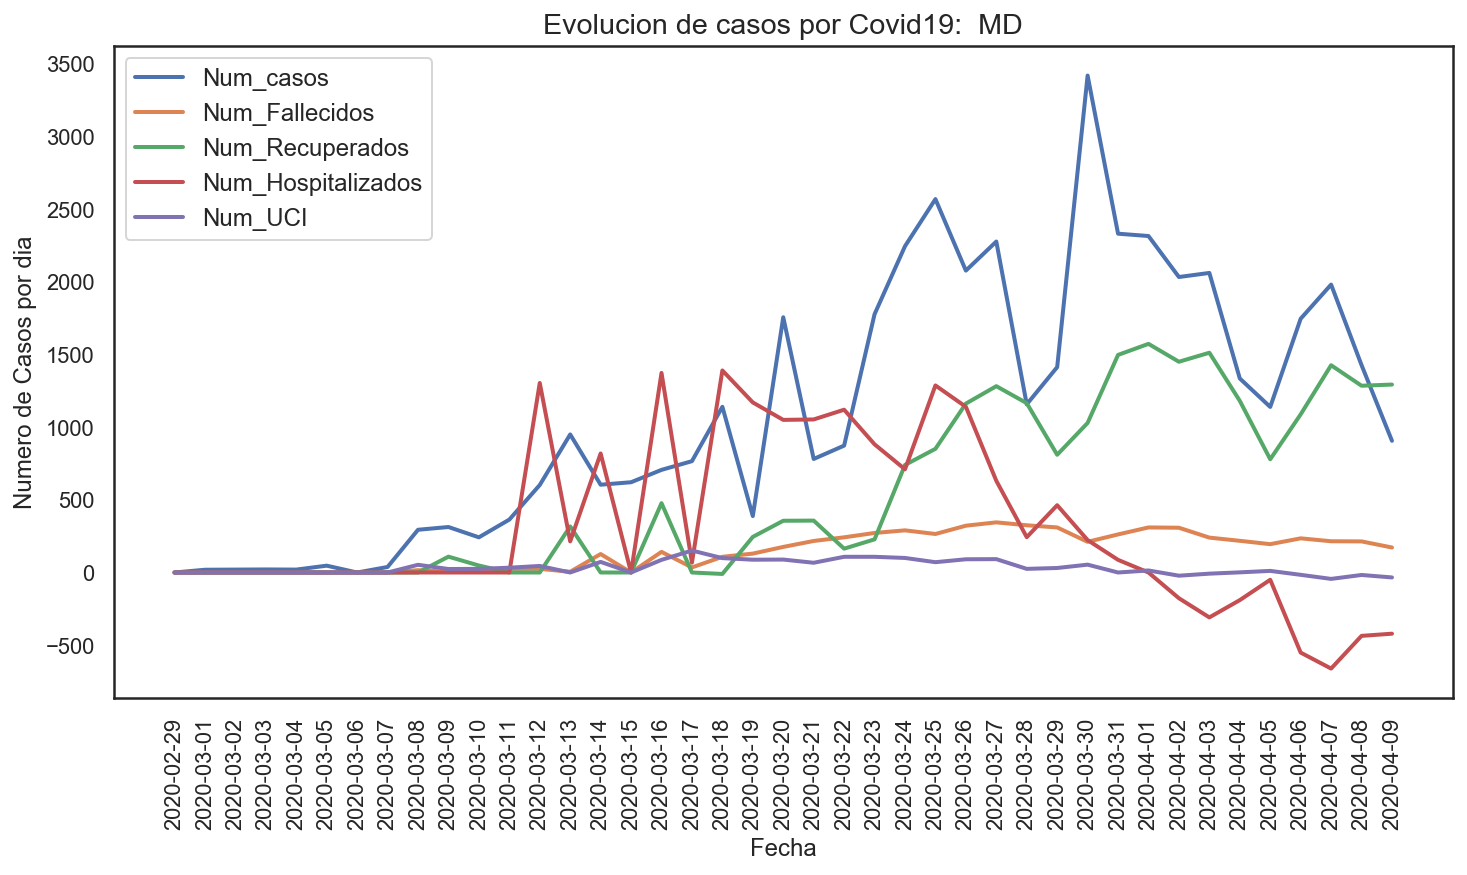

In [88]:
#Vamos a representar por comunidad autonoma. Los datos que se muestran: 
#En este caso partiendo con los datos, filtramos por MD. Que es la comunidad de Madrid.
#En el X, representamos la fecha
#En el eje Y numero de casos. 
df=df[df['CCAA'] == 'MD']
Comunidad ='MD'
#Nos quedamos con la comunidad valenciana. Representamos estos datos. 
#Cogemos como origen de fecha.Y sera nuestro indice. 
df.set_index('Fecha', inplace=True)
#Seleccionamos los datos que queremos mostrar. 
# Make list of cases and case change rates
casos = ('Num_casos', 'Num_Fallecidos', 'Num_Recuperados', 'Num_Hospitalizados', 'Num_UCI') 
#Representamos los datos para ver la tendencia. 
# Plot cases
plt.figure(figsize=(12,6))
plt.xlabel ('Fecha')
plt.ylabel('Numero de Casos por dia')
plt.title('Evolucion de casos por Covid19:  ' + Comunidad, fontsize='x-large')

plt.plot(df.index, df.Num_casos, linewidth=2)
plt.plot(df.index, df.Num_Fallecidos, linewidth=2)
plt.plot(df.index, df.Num_Recuperados, linewidth=2)
plt.plot(df.index, df.Num_Hospitalizados, linewidth=2)
plt.plot(df.index, df.Num_UCI, linewidth=2)
#Rotamos  90 grados las fechas para mostrarlo.
plt.xticks(rotation='vertical')

plt.legend(casos, loc='upper left', fontsize='large')
plt.show()

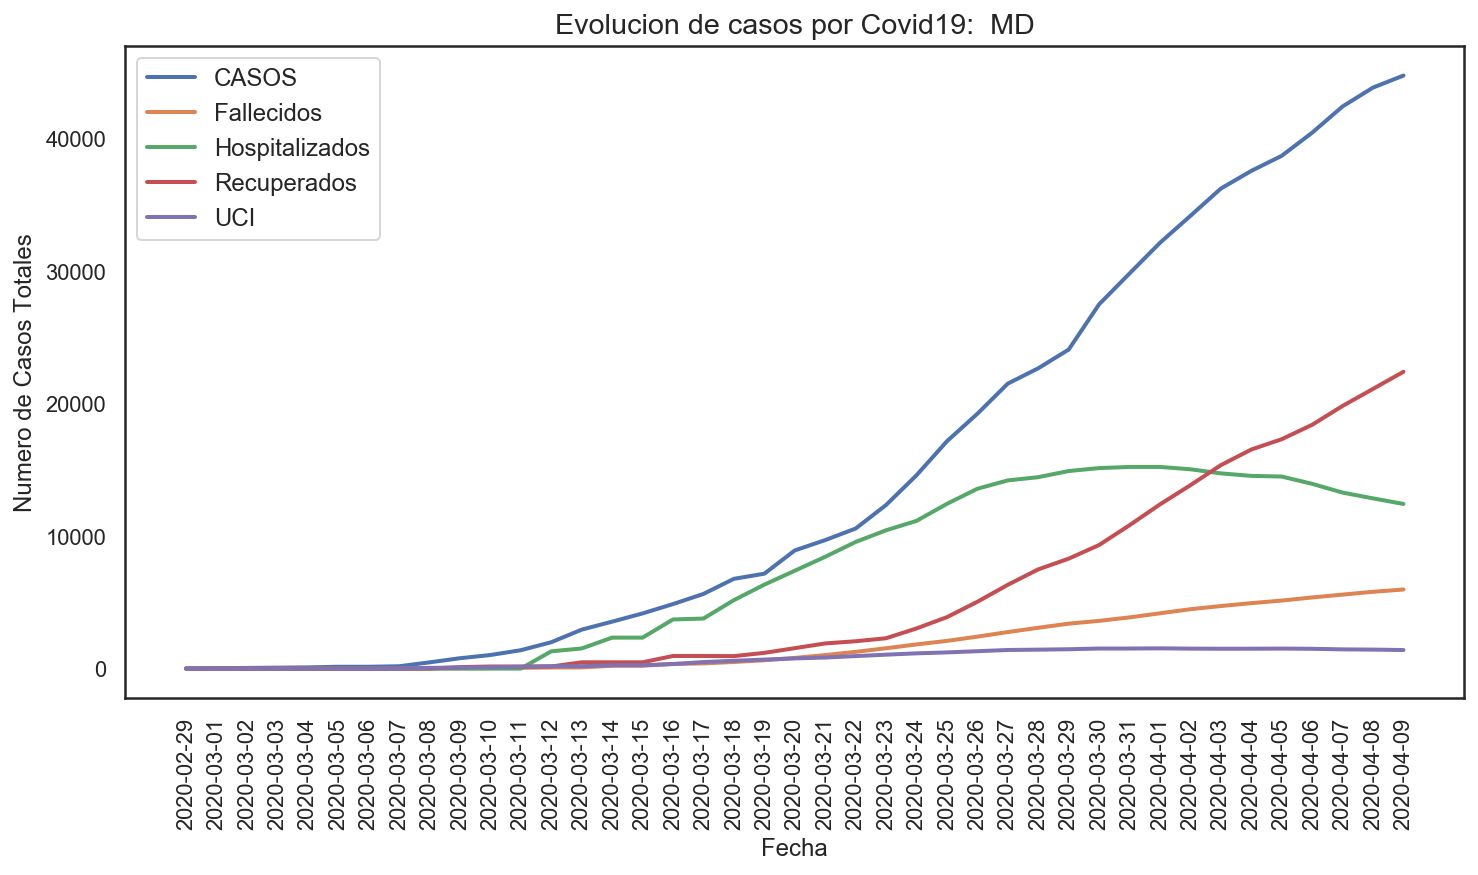

In [89]:
#Tenemos todas la columnas del proceso#
df.columns.tolist()
#Ahora vamos a comprobar el numero de Fallecidos, Hospitalizados, Recuperados y Uci. Este sera el total segun ha ido el transcurso
#de los dias. 
#vc.set_index('Fecha', inplace=True)
#Seleccionamos los datos que queremos mostrar. 
# Make list of cases and case change rates
casos = ('CASOS','Fallecidos', 'Hospitalizados', 'Recuperados', 'UCI') 
#Representamos los datos para ver la tendencia. 
# Plot cases
plt.figure(figsize=(12,6))
plt.xlabel ('Fecha')
plt.ylabel('Numero de Casos Totales')
plt.title('Evolucion de casos por Covid19:  ' + Comunidad, fontsize='x-large')

plt.plot(df.index, df.CASOS, linewidth=2)
plt.plot(df.index, df.Fallecidos, linewidth=2)
plt.plot(df.index, df.Hospitalizados, linewidth=2)
plt.plot(df.index, df.Recuperados, linewidth=2)
plt.plot(df.index, df.UCI, linewidth=2)
#Rotamos  90 grados las fechas para mostrarlo.
plt.xticks(rotation='vertical')

plt.legend(casos, loc='upper left',fontsize='large')
plt.show()

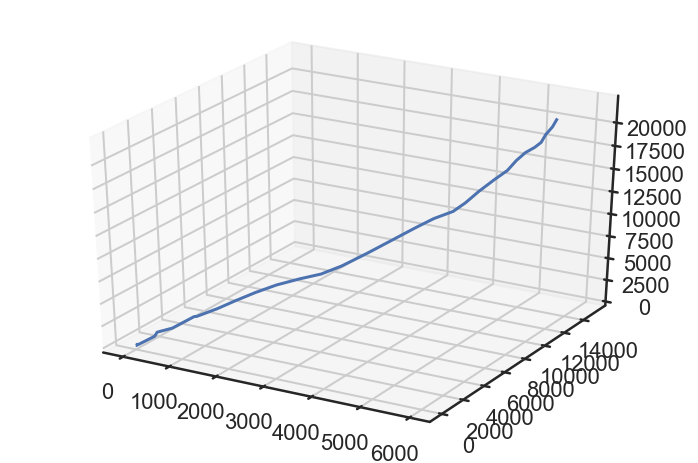

In [90]:
#Aqui tendriamos un ejemplo para usar PCA. https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering
# Creamos un bonito grafico en 3D. 
# Modulos con los que trabajaremos
from mpl_toolkits.mplot3d import axes3d
# Creamos la figura
fig = plt.figure()
# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
# Datos en array bi-dimensional.Es decir es necesario que esten como una matriz
x = np.array([df['Fallecidos']])
y = np.array([df['Hospitalizados']])
z = np.array([df['Recuperados']])
# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(x, y, z)

# Mostramos el gráfico
plt.show()

#Si quisieramos trabajar con scatter 
# Datos en array bi-dimensional.Es decir es necesario que esten como una matriz
x = np.array([df['Fallecidos']])
y = np.array([df['Hospitalizados']])
z = np.array([df['Recuperados']])
# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(x, y, z)

# Mostramos el gráfico
plt.show()

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')

# Mostramos el gráfico
plt.show()



In [91]:
#Este tipo de grafico no nos aporta ninguna informacion ya que estamos expuestos a una constante fija como es el calendario de fechas.
#Tenemos todas la columnas del proceso#
df.columns.tolist()

['CCAA',
 'Region Desc',
 'CASOS',
 'Fallecidos',
 'Hospitalizados',
 'Recuperados',
 'UCI',
 'NUTS2',
 'Densidad',
 'Medicos',
 'Hombres',
 'Mujeres',
 'Camas',
 'Ratio_Casos',
 'Ratio_Fallecidos',
 'Ratio_Hospitalizados',
 'Ratio_Recuperados',
 'Ratio_UCI',
 'Num_casos',
 'Ratio_Num_casos',
 'Num_Fallecidos',
 'Ratio_Num_Fallecidos',
 'Num_Recuperados',
 'Ratio_Num_Recuperados',
 'Num_Hospitalizados',
 'Ratio_Num_Hospitalizados',
 'Num_UCI',
 'Ratio_Num_UCI',
 'Ratio_Medicos',
 'Ratio_Camas',
 'dias_desde_caso_10']

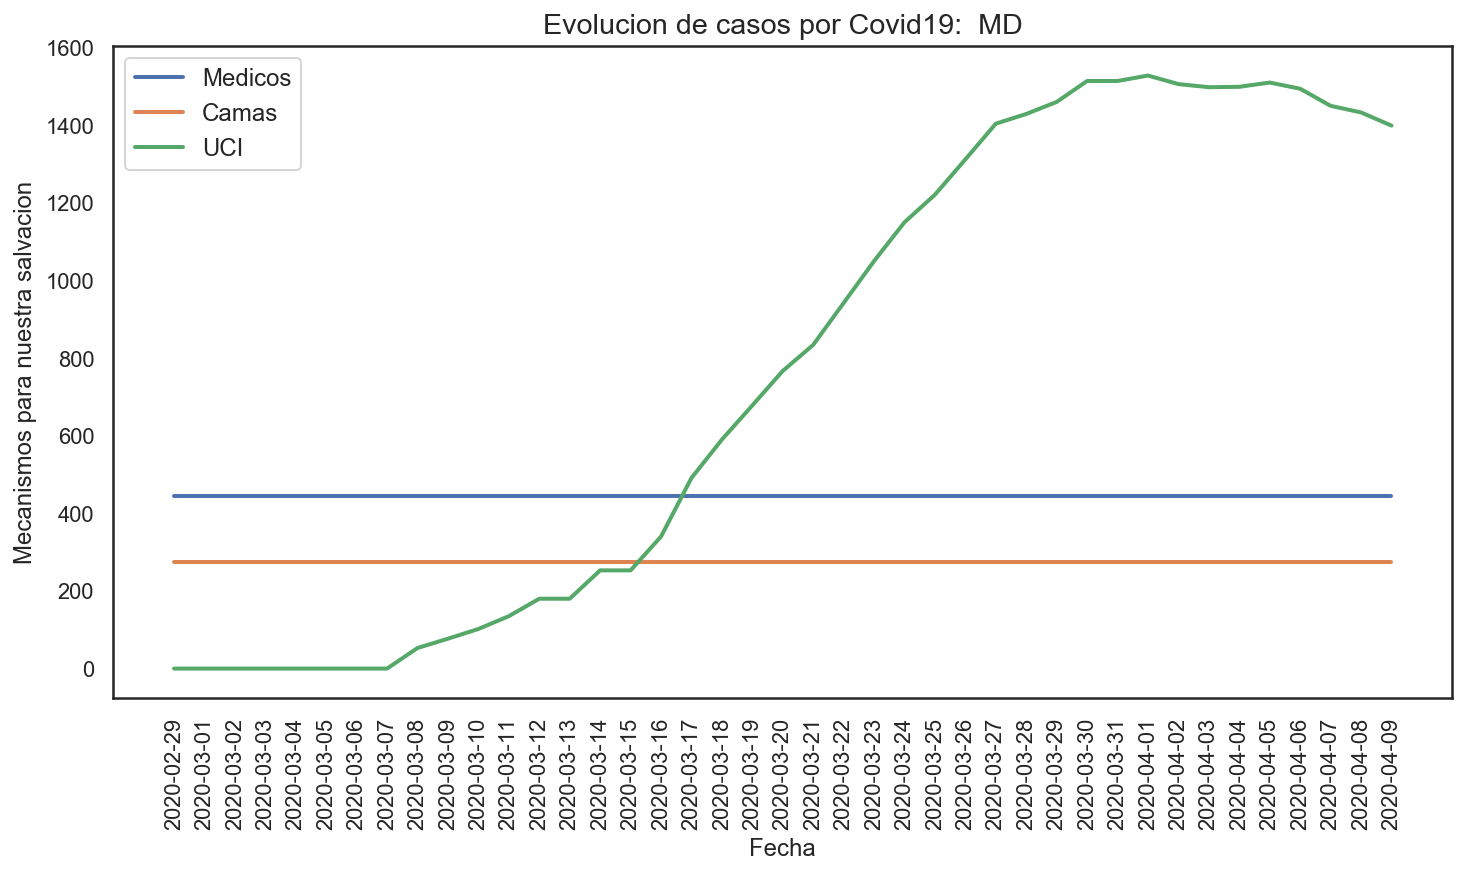

In [92]:
#A partir de los graficos mostrados, como ultima representacion vamos a ver el numero de medicos, camas, y NUTS2.
#Tenemos todas la columnas del proceso#
df.columns.tolist()
#Ahora vamos a comprobar el numero de Fallecidos, Hospitalizados, Recuperados y Uci. Este sera el total segun ha ido el transcurso
#de los dias. 
#vc.set_index('Fecha', inplace=True)
#Seleccionamos los datos que queremos mostrar. 
# Make list of cases and case change rates
casos = ('Medicos','Camas','UCI') 
#Representamos los datos para ver la tendencia. 
# Plot cases
plt.figure(figsize=(12,6))
plt.xlabel ('Fecha')
plt.ylabel('Mecanismos para nuestra salvacion')
plt.title('Evolucion de casos por Covid19:  ' + Comunidad, fontsize='x-large')
plt.plot(df.index, df.Medicos, linewidth=2)
plt.plot(df.index, df.Camas, linewidth=2)
plt.plot(df.index, df.UCI, linewidth=2)

#Rotamos  90 grados las fechas para mostrarlo.
plt.xticks(rotation='vertical')

plt.legend(casos, loc='upper left',fontsize='large')
plt.show()


In [93]:
####COMENZAMOS CON EL PROCESO 

In [94]:
df.columns.tolist()

['CCAA',
 'Region Desc',
 'CASOS',
 'Fallecidos',
 'Hospitalizados',
 'Recuperados',
 'UCI',
 'NUTS2',
 'Densidad',
 'Medicos',
 'Hombres',
 'Mujeres',
 'Camas',
 'Ratio_Casos',
 'Ratio_Fallecidos',
 'Ratio_Hospitalizados',
 'Ratio_Recuperados',
 'Ratio_UCI',
 'Num_casos',
 'Ratio_Num_casos',
 'Num_Fallecidos',
 'Ratio_Num_Fallecidos',
 'Num_Recuperados',
 'Ratio_Num_Recuperados',
 'Num_Hospitalizados',
 'Ratio_Num_Hospitalizados',
 'Num_UCI',
 'Ratio_Num_UCI',
 'Ratio_Medicos',
 'Ratio_Camas',
 'dias_desde_caso_10']

In [95]:
# Seleccionamos las columnas mas importantes
column_1 = 'Num_Hospitalizados'
column_2 = 'Num_Fallecidos'
column_3 = 'Num_casos'
column_4 = 'Num_UCI'
column_5 = 'Num_Recuperados'
#Vamos a intentar añadir mas variables al clustering
df = df[[column_1, column_2, column_3, column_4, column_5]]

#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(df).score(df) 
              for i, model in enumerate(k_mean_models)]

In [96]:
print(f"There are {df.shape[1]:,} columns in the dataframe.")
print(f"There are {df.shape[0]:,} rows in the dataframe.")

There are 5 columns in the dataframe.
There are 41 rows in the dataframe.


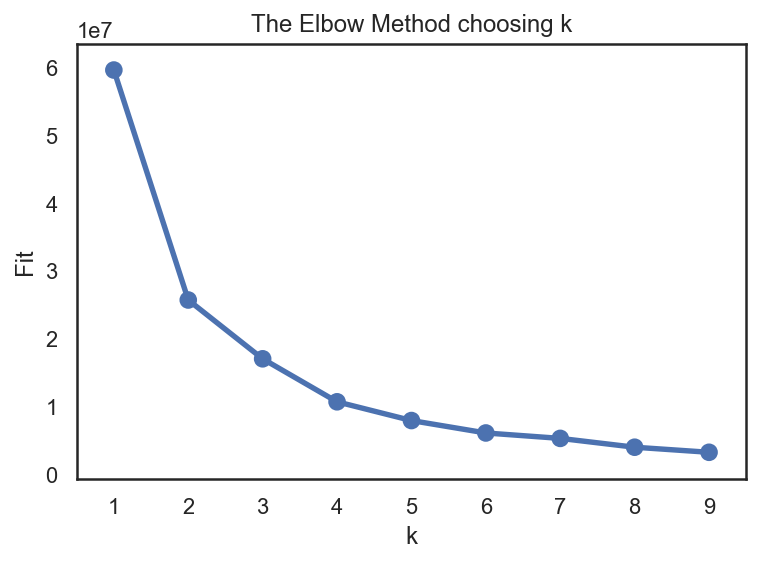

In [97]:
#Vemos a partir de la tecnica de codo, cual seria el numero bueno para ver cuantos clusters usamos en el regresor. 
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

In [98]:
#Comprobamos que a partir de 6 clusteres podemos empezar a tomar conclusiones podemos mejorar nuestro rendimiento. 
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=4) # Le añadimos 4 clusteres a nuetro proceso
kmeans.fit(df);

In [99]:
# Add the cluster labels for each data point to the dataframe
df['kmeans_labels'] = kmeans.labels_

# REPRESENTAMOS NUMERO DE CASOS VS NUMERO DE RECUPERADOS

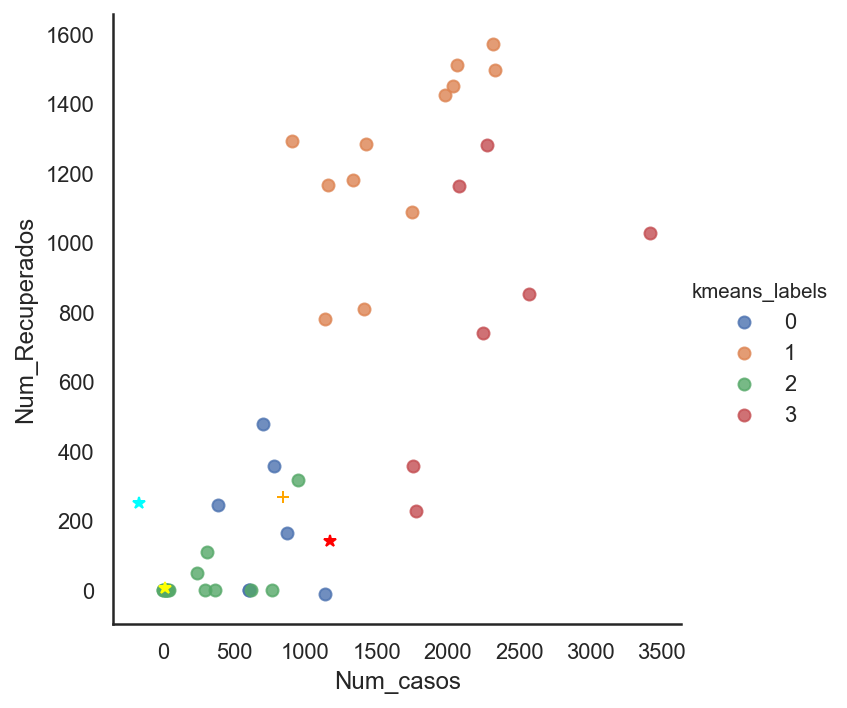

In [100]:
# Plot k-means
column_1 = 'Num_Hospitalizados'
column_2 = 'Num_Fallecidos'
column_3 = 'Num_casos'
column_4 = 'Num_UCI'
column_5 = 'Num_Recuperados'
#Ahora ploteamos en los dos ejes, Numero de casos y numero de ucis. 
kmeans_plot = sns.lmplot(x=column_3, 
                         y=column_5, 
                         data=df, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');
# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');
# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='yellow', marker='*');
# Plot the mean of cluster #4
kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange',  marker='+');
# Plot the mean of cluster #5
#means_plot.ax.plot(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], color='brown', marker='+');
# Plot the mean of cluster #6
#kmeans_plot.ax.plot(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][1], color='green', marker='/');
# Plot the mean of cluster #K-CLUSTER
#kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange', marker='*');

# REPRESENTAMOS NUMERO DE CASOS VS NUMERO DE FALLECIDOS


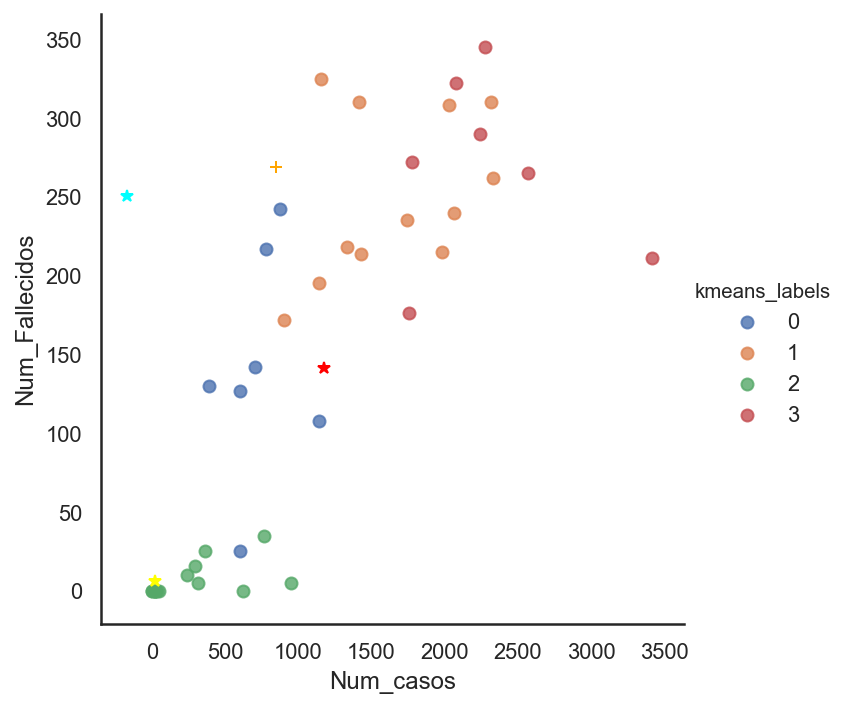

In [101]:
# Plot k-means
column_1 = 'Num_Hospitalizados'
column_2 = 'Num_Fallecidos'
column_3 = 'Num_casos'
column_4 = 'Num_UCI'
column_5 = 'Num_Recuperados'
#Ahora ploteamos en los dos ejes, Numero de casos y numero de ucis. 
kmeans_plot = sns.lmplot(x=column_3, 
                         y=column_2, 
                         data=df, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');
# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');
# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='yellow', marker='*');
# Plot the mean of cluster #4
kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange',  marker='+');
# Plot the mean of cluster #5
#means_plot.ax.plot(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], color='brown', marker='+');
# Plot the mean of cluster #6
#kmeans_plot.ax.plot(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][1], color='green', marker='/');
# Plot the mean of cluster #K-CLUSTER
#kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange', marker='*');

# REPRESENTAMOS NUMERO DE CASOS RESPECTO HOSPITALIZADOS

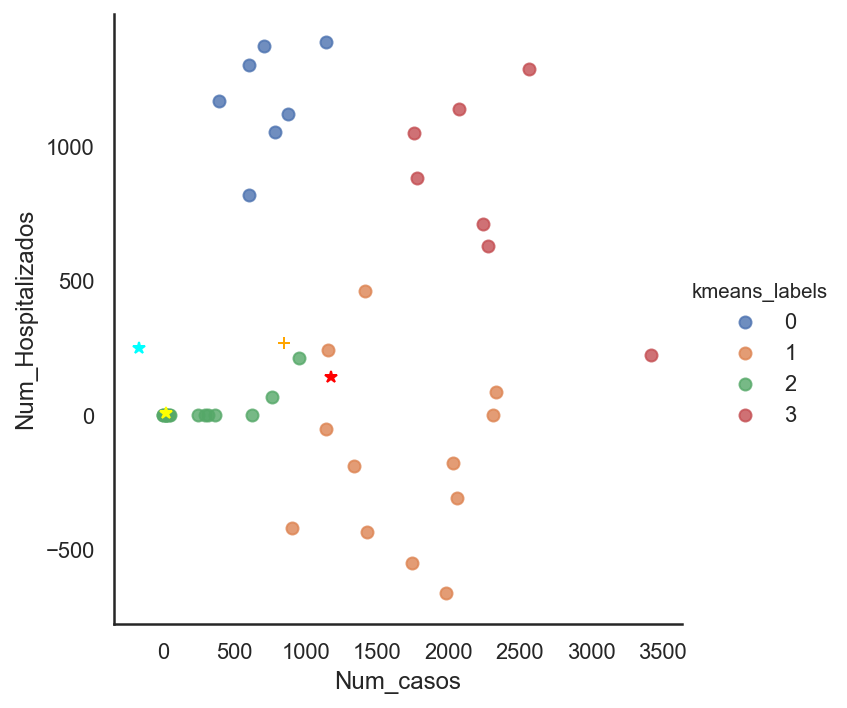

In [102]:
# Plot k-means
column_1 = 'Num_Hospitalizados'
column_2 = 'Num_Fallecidos'
column_3 = 'Num_casos'
column_4 = 'Num_UCI'
column_5 = 'Num_Recuperados'
#Ahora ploteamos en los dos ejes, Numero de casos y numero de ucis. 
kmeans_plot = sns.lmplot(x=column_3, 
                         y=column_1, 
                         data=df, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');
# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');
# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='yellow', marker='*');
# Plot the mean of cluster #4
kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange',  marker='+');
# Plot the mean of cluster #5
#means_plot.ax.plot(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], color='brown', marker='+');
# Plot the mean of cluster #6
#kmeans_plot.ax.plot(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][1], color='green', marker='/');
# Plot the mean of cluster #K-CLUSTER
#kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange', marker='*');

# REPRESENTAMOS NUMERO DE CASOS RESPECTO INGRESOS EN UCI

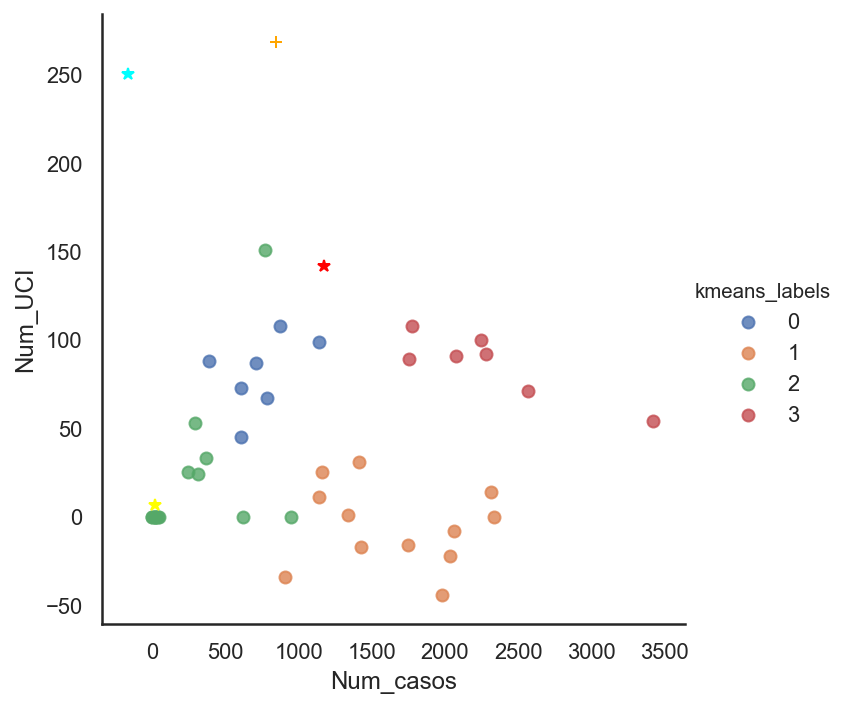

In [103]:

# Plot k-means
column_1 = 'Num_Hospitalizados'
column_2 = 'Num_Fallecidos'
column_3 = 'Num_casos'
column_4 = 'Num_UCI'
column_5 = 'Num_Recuperados'
#Ahora ploteamos en los dos ejes, Numero de casos y numero de ucis. 
kmeans_plot = sns.lmplot(x=column_3, 
                         y=column_4, 
                         data=df, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');
# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');
# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='yellow', marker='*');
# Plot the mean of cluster #4
kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange',  marker='+');
# Plot the mean of cluster #5
#means_plot.ax.plot(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], color='brown', marker='+');
# Plot the mean of cluster #6
#kmeans_plot.ax.plot(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][1], color='green', marker='/');
# Plot the mean of cluster #K-CLUSTER
#kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange', marker='*');

# REPRESENTAMOS NUMERO DE CASOS UCI Y FALLECIDOS

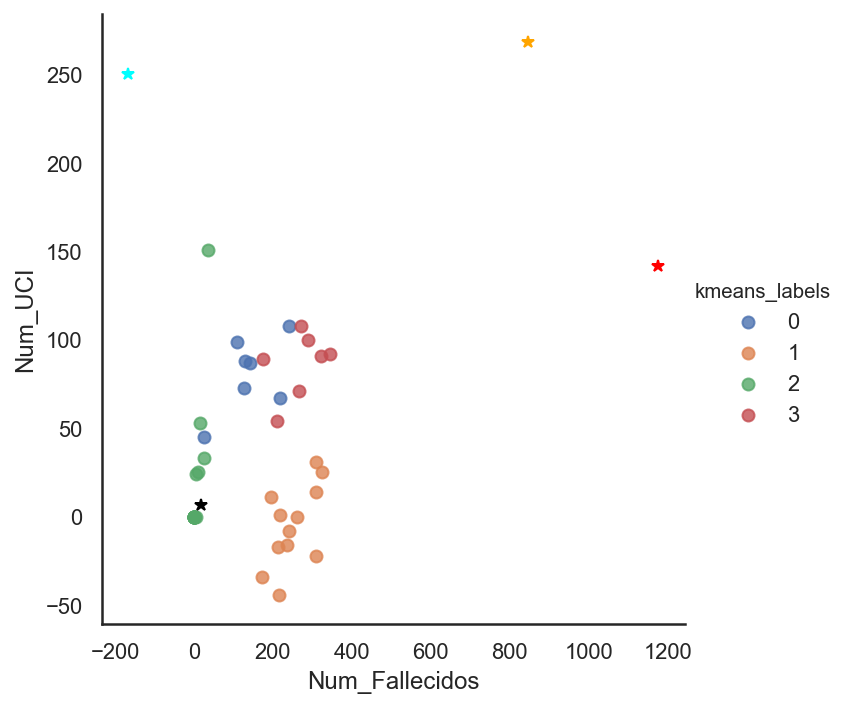

In [106]:
# Plot k-means
column_1 = 'Num_Hospitalizados'
column_2 = 'Num_Fallecidos'
column_3 = 'Num_casos'
column_4 = 'Num_UCI'
column_5 = 'Num_Recuperados'
#Ahora ploteamos en los dos ejes, Numero de casos y numero de ucis. 
kmeans_plot = sns.lmplot(x=column_2, 
                         y=column_4, 
                         data=df, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');
# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');
# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='black', marker='*');
# Plot the mean of cluster #4
kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange',  marker='*');
# Plot the mean of cluster #5
#means_plot.ax.plot(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], color='brown', marker='+');
# Plot the mean of cluster #6
#kmeans_plot.ax.plot(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][1], color='green', marker='/');
# Plot the mean of cluster #K-CLUSTER
#kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange', marker='*');

# REPRESENTAMOS NUMERO DE HOSPITALIZADOS RESPECTO FALLECIDOS


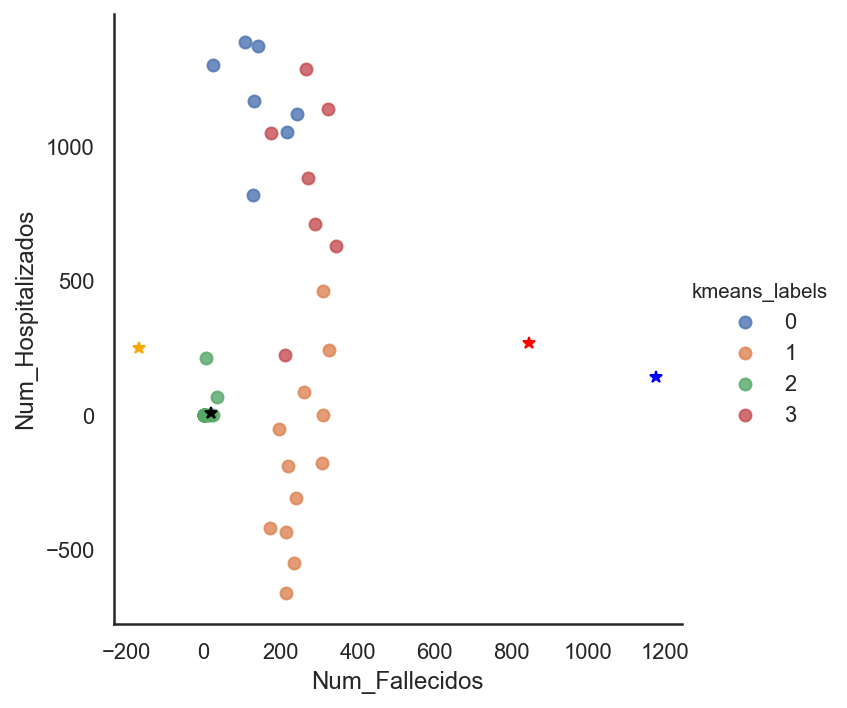

In [108]:
# Plot k-means
column_1 = 'Num_Hospitalizados'
column_2 = 'Num_Fallecidos'
column_3 = 'Num_casos'
column_4 = 'Num_UCI'
column_5 = 'Num_Recuperados'
#Ahora ploteamos en los dos ejes, Numero de casos y numero de ucis. 
kmeans_plot = sns.lmplot(x=column_2, 
                         y=column_1, 
                         data=df, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='blue', marker='*');
# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='orange', marker='*');
# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='black', marker='*');
# Plot the mean of cluster #4
kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='red',  marker='*');
# Plot the mean of cluster #5
#means_plot.ax.plot(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], color='brown', marker='+');
# Plot the mean of cluster #6
#kmeans_plot.ax.plot(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][1], color='green', marker='/');
# Plot the mean of cluster #K-CLUSTER
#kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='orange', marker='*');

In [ ]:
# REPRESENTAMOS NUMERO DE HOSPITALIZADOS RESPECTO FALLECIDOS


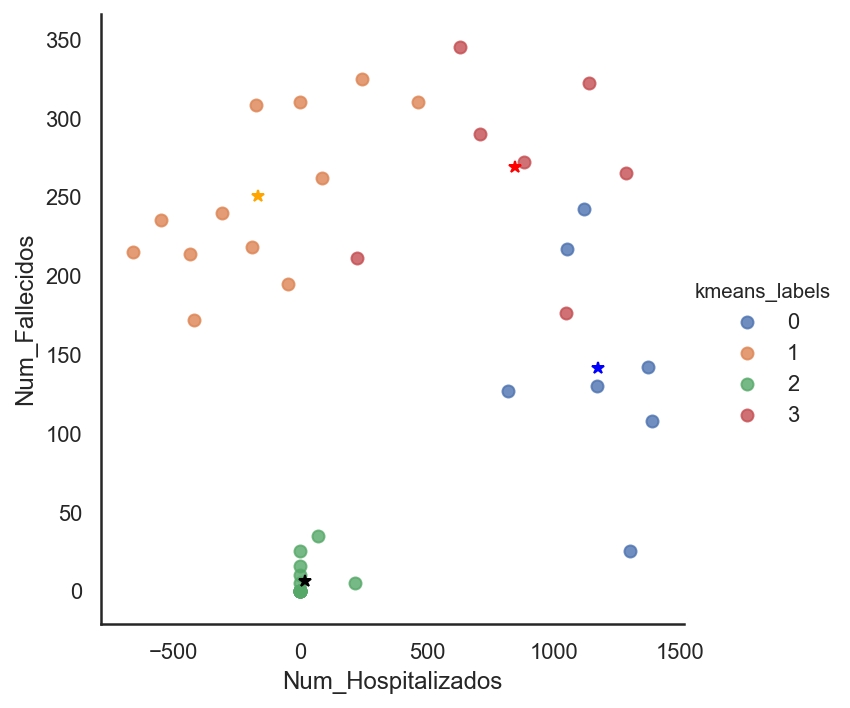

In [109]:
# Plot k-means
column_1 = 'Num_Hospitalizados'
column_2 = 'Num_Fallecidos'
column_3 = 'Num_casos'
column_4 = 'Num_UCI'
column_5 = 'Num_Recuperados'
#Ahora ploteamos en los dos ejes, Numero de casos y numero de ucis. 
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2, 
                         data=df, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='blue', marker='*');
# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='orange', marker='*');
# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='black', marker='*');
# Plot the mean of cluster #4
kmeans_plot.ax.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color='red',  marker='*');
# Plot the mean of cluster #5
#means_plot.ax.plot(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], color='brown', marker='+');
# Plot the mean of cluster #6
#kmeans_plot.ax.plot(kmeans.cluster_centers_[5][0], kmeans.cluster_centers_[5][1], color='green', marker='/');
# Plot the mean of cluster #K-CLUSTER